In [2]:
%pip install mca

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6008 sha256=da0c2c82bb69ff23a5279b5885789ae51603ab211778180112940523a9206168
  Stored in directory: c:\users\riyaa\appdata\local\pip\cache\wheels\41\3c\28\32383be9777008d3318b6e787b89273ca4a6c6c915ce9bd1f3
Successfully built mca
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import mca
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
processed_data = pd.read_csv("../data/final_df.csv")

In [4]:
mca_model = mca.MCA(processed_data)

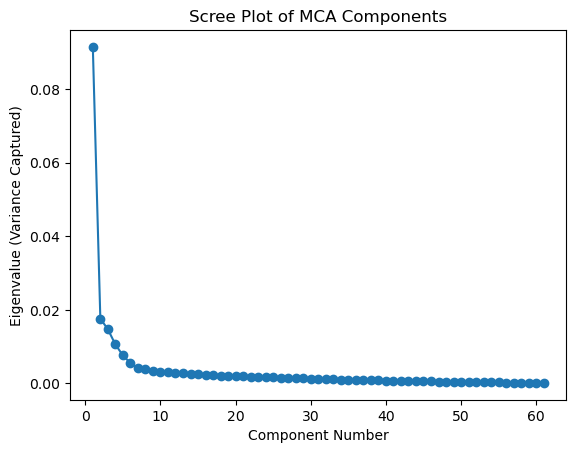

In [5]:
eigenvalues = mca_model.L

plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker="o", linestyle="-")
plt.xlabel("Component Number")
plt.ylabel("Eigenvalue (Variance Captured)")
plt.title("Scree Plot of MCA Components")
plt.show()

In [6]:
mca_transformed_90 = mca_model.fs_c() # default is 0.9

print("original (processed): ", processed_data.shape)
print("mca: ", mca_transformed_90.shape)


original (processed):  (1211, 84)
mca:  (84, 27)


In [7]:
mca_transformed_80 = mca_model.fs_c(0.8) 
print(mca_transformed_80.shape)

(84, 15)


In [8]:
mca_transformed_75 = mca_model.fs_c(0.75) 
print(mca_transformed_75.shape)

(84, 11)


In [9]:
mca_transformed_70 = mca_model.fs_c(0.7) 
print(mca_transformed_70.shape)

(84, 8)


In [10]:
mca_data = mca_transformed_75

In [11]:
from sklearn.preprocessing import MinMaxScaler

absolute_contributions = mca_data

# Convert to DataFrame for easier interpretation
contribution_df = pd.DataFrame(
    absolute_contributions, 
    index=processed_data.columns,  # Features as row labels
    columns=[f"MCA{dim+1}" for dim in range(mca_data.shape[1])]  # MCA components as columns
)

# Normalize each MCA component's contributions using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))  # Ensures positive and negative values are kept
normalized_contributions = scaler.fit_transform(contribution_df)

# Convert back to a DataFrame
contribution_df = pd.DataFrame(
    normalized_contributions,
    index=contribution_df.index,
    columns=contribution_df.columns
)

feature_contributions = contribution_df

(84, 11)
84


<Figure size 1200x800 with 0 Axes>

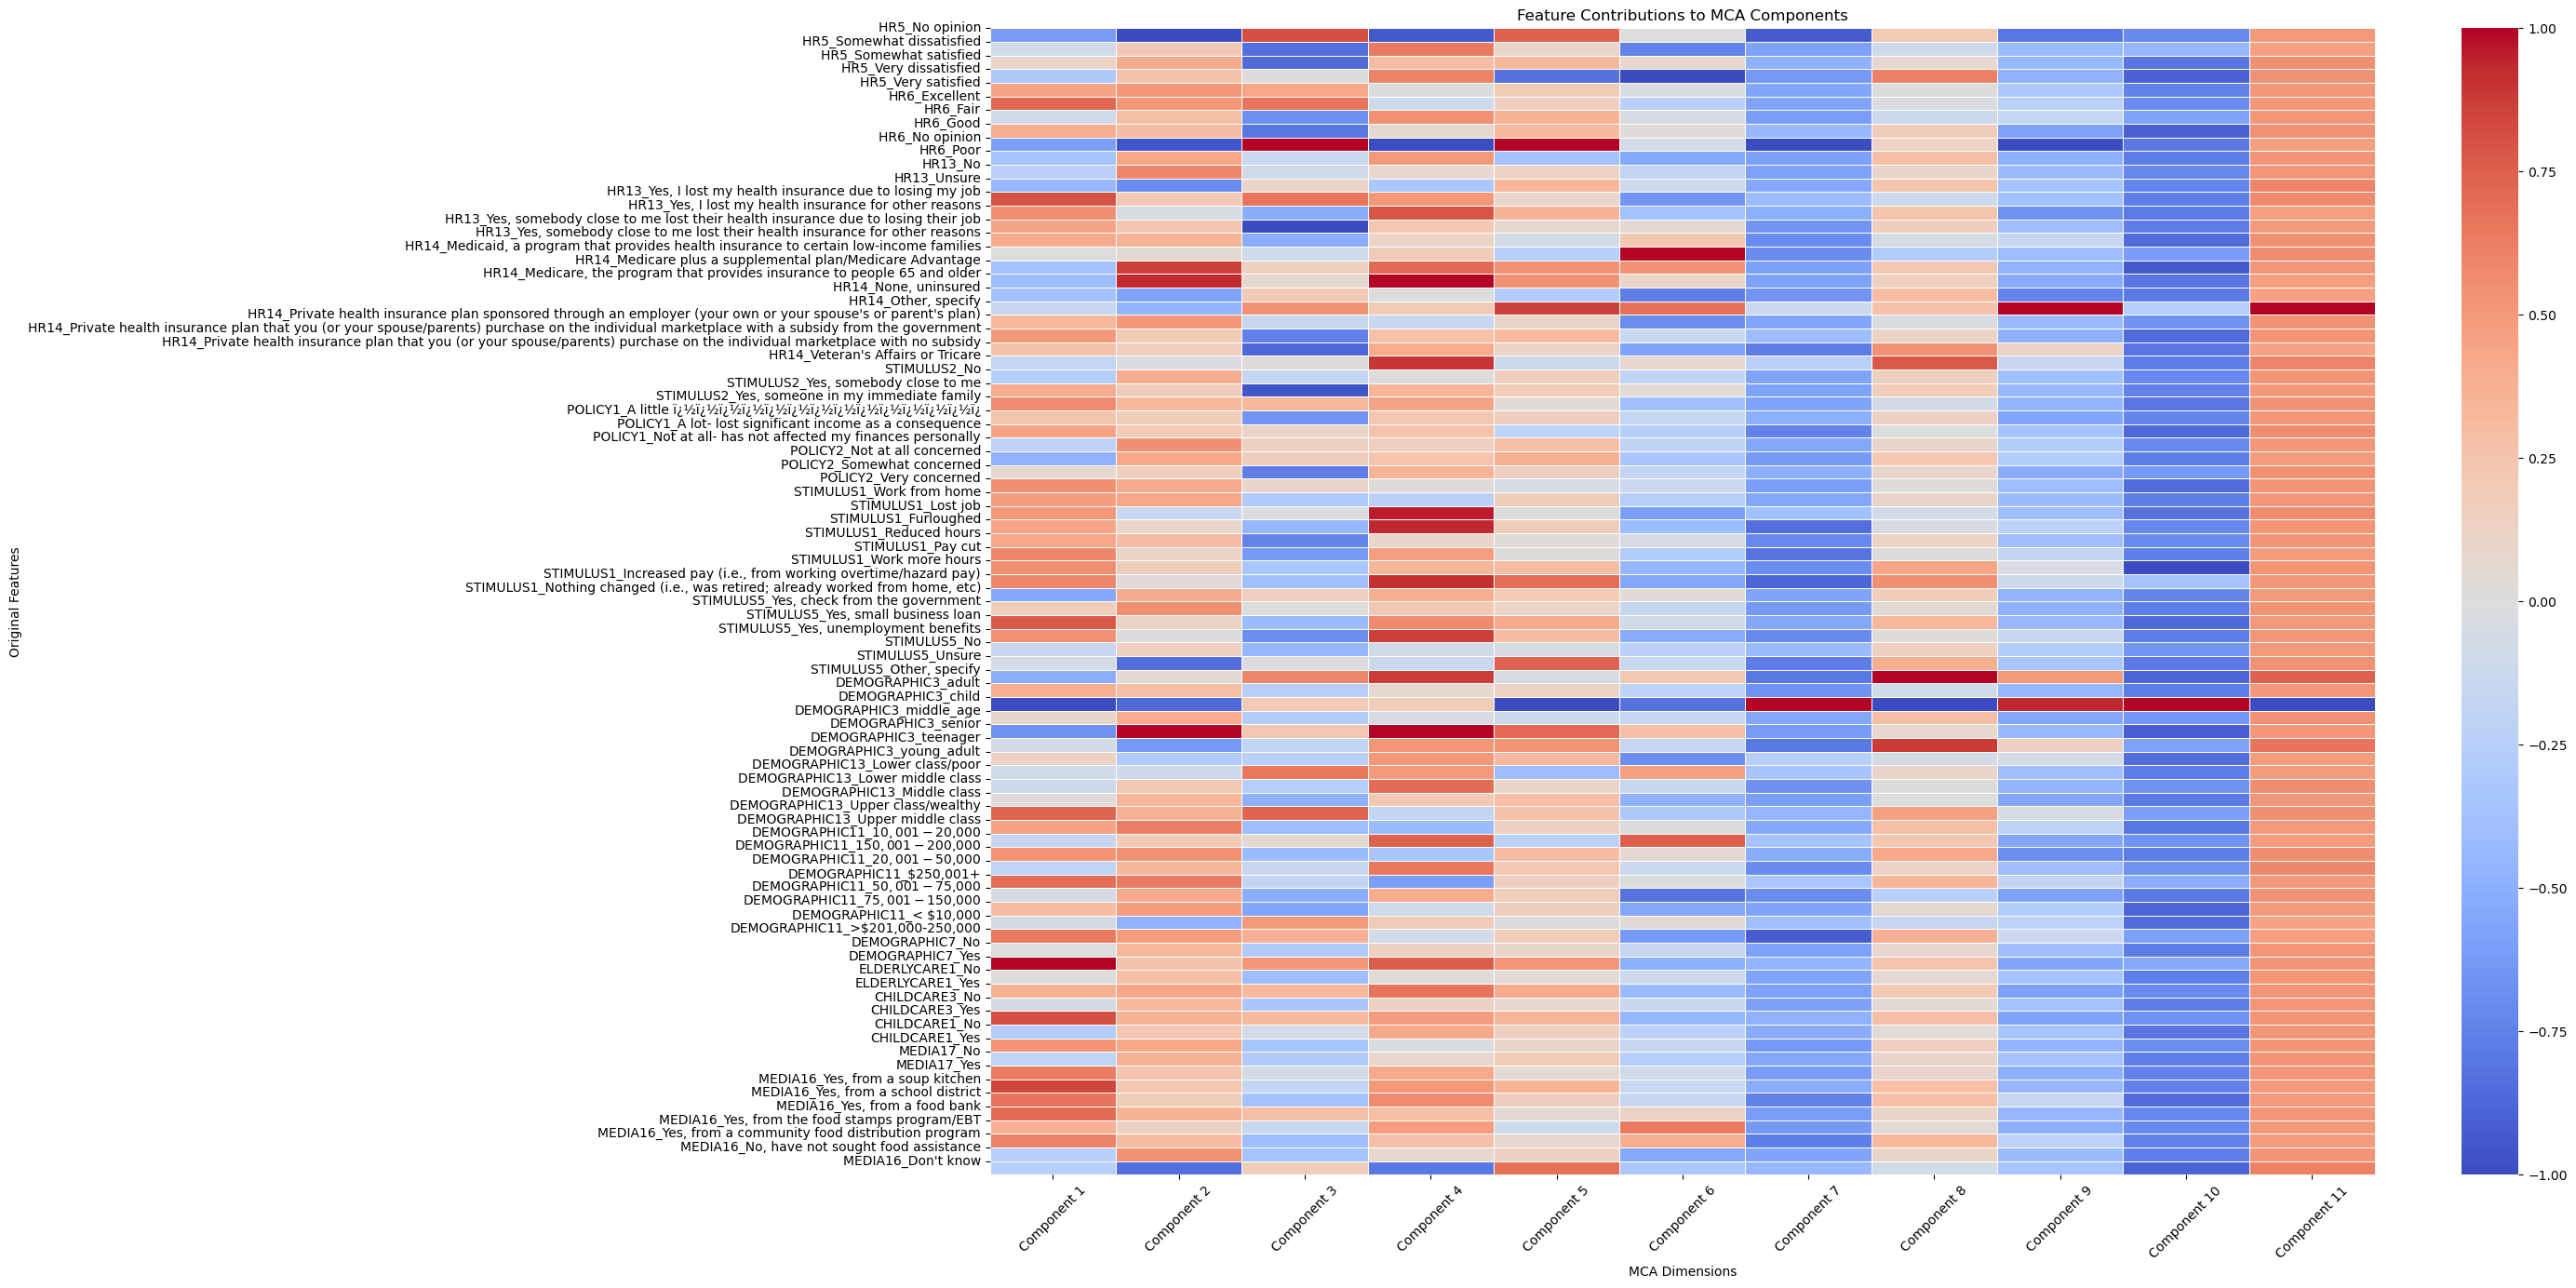

In [12]:
original_feature_names = processed_data.columns.tolist()
# Assume 'contributions' is the DataFrame holding MCA contributions (rows: features, cols: components)
plt.figure(figsize=(12, 8))

print(feature_contributions.shape)
print(len(original_feature_names))

# Plot heatmap
plt.figure(figsize=(24, 16))
ax = sns.heatmap(feature_contributions, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, center=0, vmin=-1, vmax=1)
plt.title("Feature Contributions to MCA Components")
plt.xlabel("MCA Dimensions")
plt.ylabel("Original Features")
ax.set_yticks(np.arange(len(feature_contributions.index)))
ax.set_yticklabels(feature_contributions.index, rotation=0, fontsize=10)  # For row labels (features)
ax.set_xticklabels([f"Component {i+1}" for i in range(mca_data.shape[1])], rotation=45, fontsize=10)  # For components
plt.show()

In [13]:
# Sort each MCA component by its top and bottom contributions to see top features
top_contributions = contribution_df.apply(lambda x: x.nlargest(2), axis=0).fillna(0)
bottom_contributions = contribution_df.apply(lambda x: x.nsmallest(2), axis=0).fillna(0)
filtered_features = pd.concat([top_contributions, bottom_contributions])

print(filtered_features)


                                                        MCA1      MCA2  \
DEMOGRAPHIC11_$10,001-$20,000                       0.000000  0.000000   
DEMOGRAPHIC3_child                                  0.000000  0.000000   
DEMOGRAPHIC3_senior                                 0.000000  1.000000   
DEMOGRAPHIC3_teenager                               0.000000  0.000000   
DEMOGRAPHIC7_Yes                                    1.000000  0.000000   
HR14_Medicaid, a program that provides health i...  0.000000  0.000000   
HR14_Medicare, the program that provides insura...  0.000000  0.926363   
HR14_Other, specify                                 0.000000  0.000000   
HR5_No opinion                                      0.000000  0.000000   
HR6_No opinion                                      0.000000  0.000000   
MEDIA16_Yes, from a soup kitchen                    0.848653  0.000000   
STIMULUS5_Other, specify                            0.000000  0.000000   
DEMOGRAPHIC11_< $10,000               

(23, 11)
84


<Figure size 1200x800 with 0 Axes>

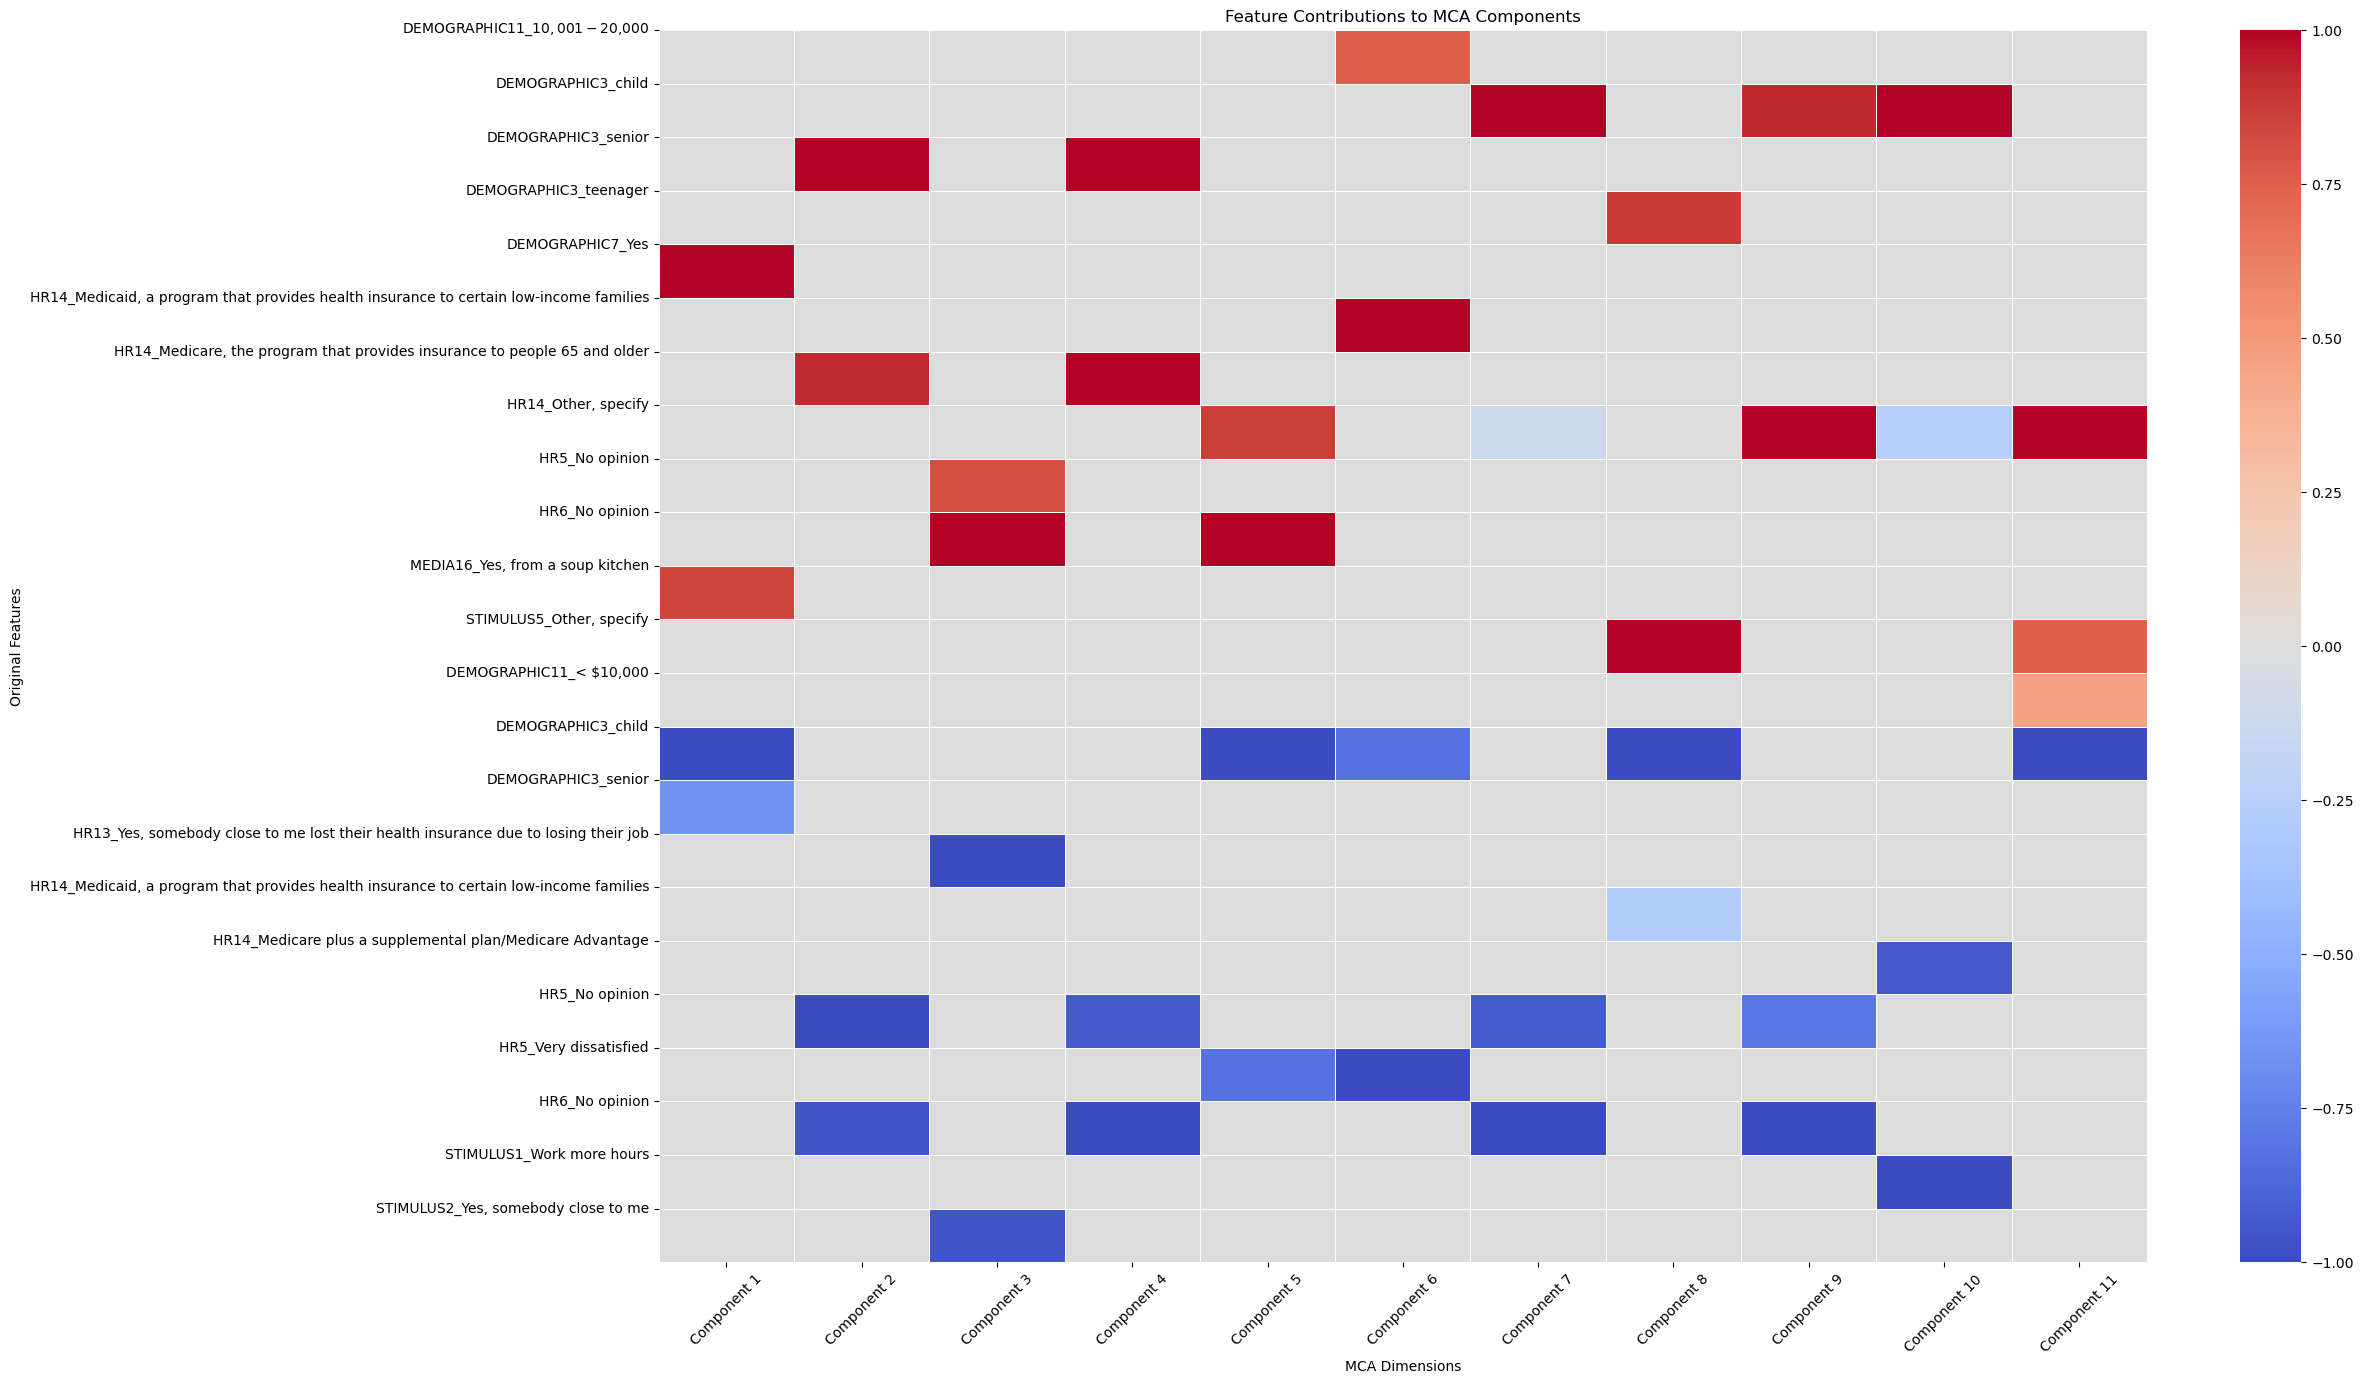

In [14]:

original_feature_names = processed_data.columns.tolist()
plt.figure(figsize=(12, 8))

print(filtered_features.shape)
print(len(original_feature_names))

# Plot heatmap
plt.figure(figsize=(24, 16))
ax = sns.heatmap(filtered_features, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, center=0, vmin=-1, vmax=1)
plt.title("Feature Contributions to MCA Components")
plt.xlabel("MCA Dimensions")
plt.ylabel("Original Features")
ax.set_yticks(np.arange(len(filtered_features.index)))
ax.set_yticklabels(filtered_features.index, rotation=0, fontsize=10)  # For row labels (features)
ax.set_xticklabels([f"Component {i+1}" for i in range(mca_data.shape[1])], rotation=45, fontsize=10)  # For components
plt.show()

### Grouped

In [15]:
feature_category_mapping = {
    feature: feature.split("_")[0]  # Example: "Demographics_Age" → "Demographics"
    for feature in feature_contributions.index
}
feature_category_series = pd.Series(feature_category_mapping)
grouped_contributions = feature_contributions.groupby(feature_category_series).sum()


(84, 11)
84


<Figure size 1200x800 with 0 Axes>

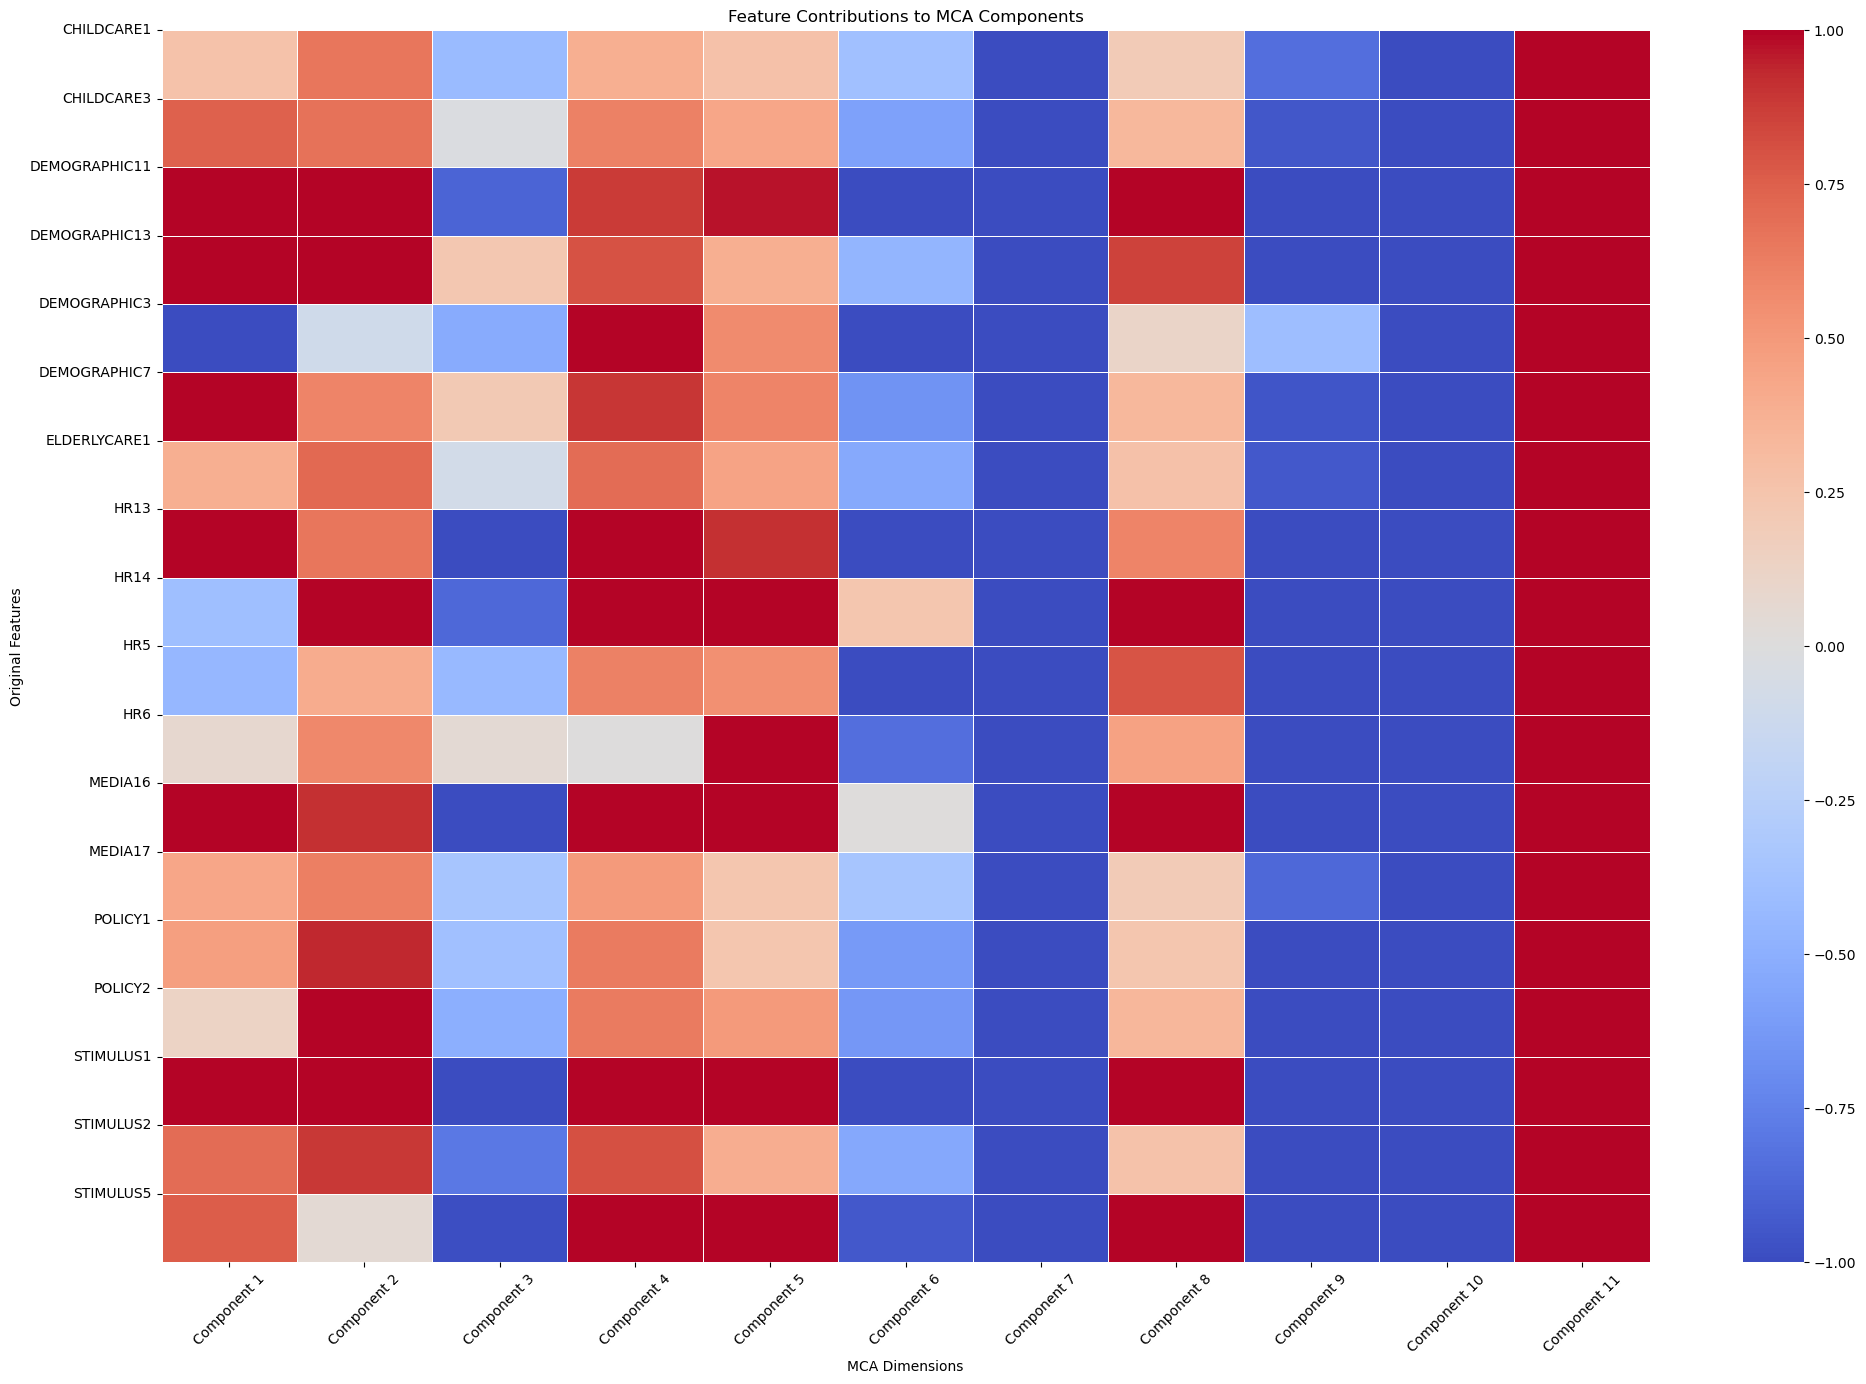

In [16]:
original_feature_names = processed_data.columns.tolist()
plt.figure(figsize=(12, 8))

print(feature_contributions.shape)
print(len(original_feature_names))

# Plot heatmap
plt.figure(figsize=(24, 16))
ax = sns.heatmap(grouped_contributions, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, center=0, vmin=-1, vmax=1)
plt.title("Feature Contributions to MCA Components")
plt.xlabel("MCA Dimensions")
plt.ylabel("Original Features")
ax.set_yticks(np.arange(len(grouped_contributions.index)))
ax.set_yticklabels(grouped_contributions.index, rotation=0, fontsize=10)  # For row labels (features)
ax.set_xticklabels([f"Component {i+1}" for i in range(mca_data.shape[1])], rotation=45, fontsize=10)  # For components
plt.show()

### Graphs

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Normalize each MCA component's contributions using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))  # Ensures positive and negative values are kept
normalized_contributions = scaler.fit_transform(contribution_df)

# Convert back to a DataFrame
contribution_df_normalized = pd.DataFrame(
    normalized_contributions,
    index=contribution_df.index,
    columns=contribution_df.columns
)

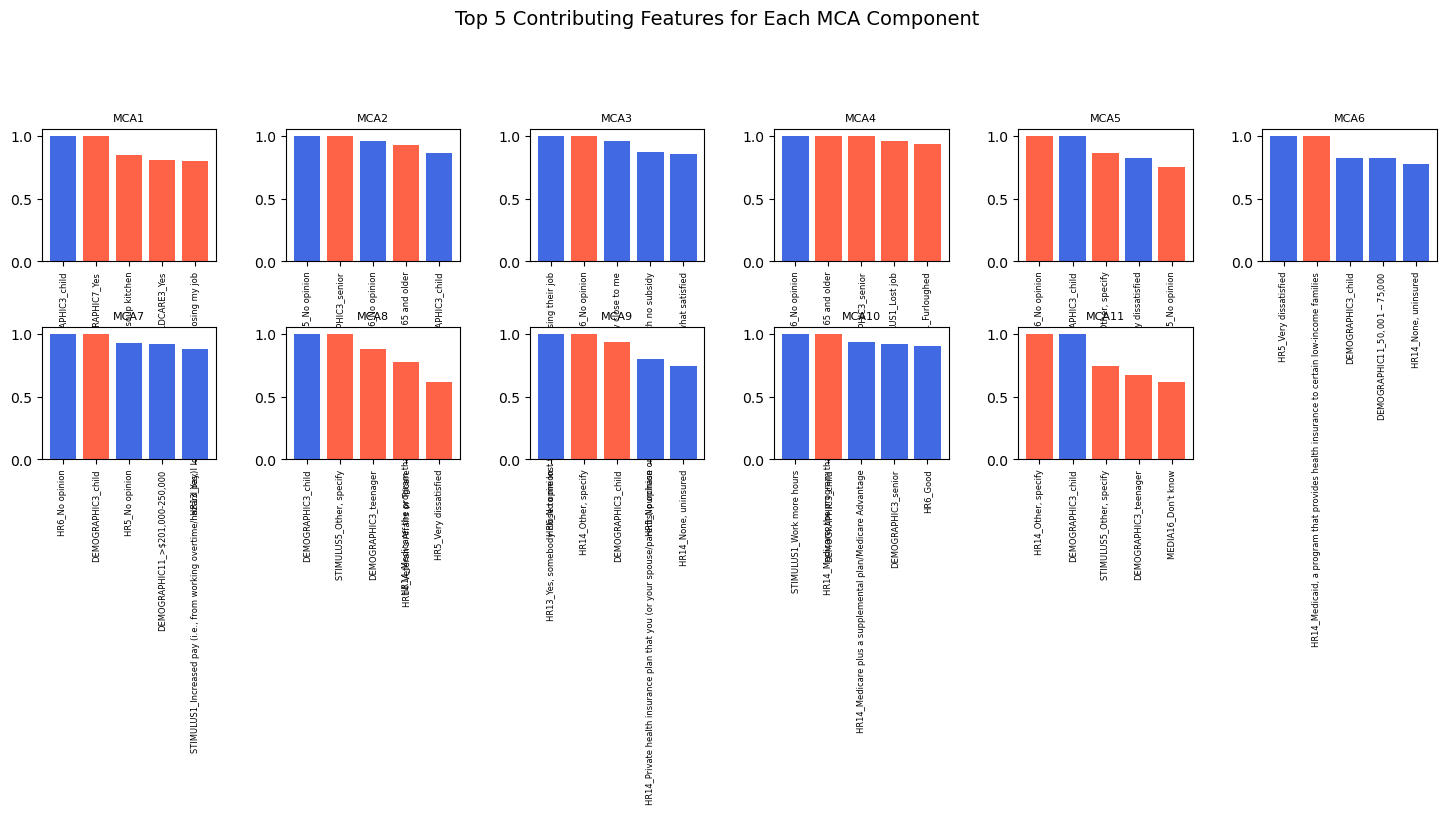

In [18]:
contribution_df = contribution_df_normalized

# Create a figure with a grid layout
num_components = 27  # Adjust based on the number of MCA components you want to visualize
num_cols = 6  # Number of columns in the grid layout
num_rows = (num_components // num_cols) + (num_components % num_cols > 0)  # Auto-adjust row count

fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(num_rows, num_cols, hspace=0.5, wspace=0.4)  # Adjust spacing

# Loop through each MCA component and plot its top 5 contributing features
for i, component in enumerate(contribution_df.columns[:num_components]):  # Limit to 27 components
    ax = fig.add_subplot(gs[i // num_cols, i % num_cols])
    
    # Select top 5 contributing features (by absolute value) but retain original signs
    top_features = contribution_df[component].abs().nlargest(5).index  # Find top 5 features
    values = contribution_df.loc[top_features, component]  # Get actual signed values
    
    # Create a bar chart
    colors = ["royalblue" if v < 0 else "tomato" for v in values]

    ax.bar(top_features, values.abs(), color=colors)
    
    
    # Formatting
    ax.set_title(component, fontsize=8)  # Title as component name
    ax.set_xticks(np.arange(len(top_features)))  # Feature names as x-axis labels
    ax.set_xticklabels(top_features, rotation=90, fontsize=6)  # Feature names as x-axis labels
    # ax.set_yticklabels([])  # Hide y-axis labels for a cleaner look

plt.suptitle("Top 5 Contributing Features for Each MCA Component", fontsize=14)
plt.show()


## Final MCA Components
### (Retaining 75% of Variance)

In [19]:
mca_components = mca_model.fs_r(0.75)

print(mca_components.shape)

(1211, 11)


In [20]:
pd.DataFrame(mca_components).to_csv("../data/mca_components.csv", index=False, header=True)

## MCA on SMOTE Balanced Data

In [8]:
smote_data = pd.read_csv("../data/df_smote_with_target.csv").iloc[:, :-1]

mca_smote = mca.MCA(smote_data)

mca_components_smote_75 = mca_smote.fs_r(0.75)
print(mca_components_smote_75.shape)

mca_components_smote_95 = mca_smote.fs_r(0.95)
print(mca_components_smote_95.shape)

pd.DataFrame(mca_components_smote_95).to_csv("../data/mca_components_smote_95.csv", index=False, header=True)
pd.DataFrame(mca_components_smote_75).to_csv("../data/mca_components_smote_75.csv", index=False, header=True)

(1947, 9)
(1947, 36)
